In [33]:
import torch
import numpy as np
import cv2
import matplotlib.pylab as plt

print(f"torch version:{torch.__version__}, cuda version:{torch.version.cuda}, cuda is available:{torch.cuda.is_available()}")

SplitLine = "\n==============================\n"

def PrintTensor(name:str, x:torch.Tensor):
    print(f"{name}:\n", x)
    print(f"{name}的维度数(秩):{x.dim()}; 形状:{x.shape}; 所在设备:{x.device}; 元素个数:{x.numel()}; 元素类型:{x.dtype}, 元素的字节大小:{x.element_size()}", end=SplitLine)

def PrintArray(name:str, x:np.ndarray):
    print(f"{name}:\n", x)
    print(f"{name}的维度数(秩):{x.ndim}; 元素类型：{x.dtype}; 数组的维度形状：{x.shape}; 元素个数：{x.size}; 元素的字节大小：{x.itemsize}", end=SplitLine)

torch version:1.12.1+cu113, cuda version:11.3, cuda is available:True


### Tensor切片及索引
与numpy中的用法类似

In [6]:
a = torch.randn((3, 4, 3))
PrintTensor("a", a)

# 获取指定元素
a0 = a[0,1,2]
PrintTensor("a0", a0)
a0_ = a[0][1][2]
PrintTensor("a0_", a0_)
print(a0.equal(a0_))
PrintTensor("a0 is eq a0_", a0.eq(a0_))

a:
 tensor([[[ 0.8113,  0.2573, -0.8900],
         [ 0.5694, -0.1195,  2.2417],
         [-0.7662,  0.4322, -1.3310],
         [-0.1500,  0.7003, -1.2147]],

        [[-0.4761, -1.0442, -1.1274],
         [-0.9523,  1.1195, -1.9047],
         [ 1.8299,  0.0421,  0.2474],
         [ 0.9948, -2.2448,  0.8666]],

        [[ 1.7132, -0.0212, -0.6290],
         [-1.4243,  0.1068,  1.4462],
         [-1.0355,  0.1656,  0.8839],
         [ 0.6918, -0.8072, -0.7844]]])
a的维度数(秩):3; 形状:torch.Size([3, 4, 3]); 所在设备:cpu; 元素个数:36; 元素类型:torch.float32, 元素的字节大小:4
a0:
 tensor(2.2417)
a0的维度数(秩):0; 形状:torch.Size([]); 所在设备:cpu; 元素个数:1; 元素类型:torch.float32, 元素的字节大小:4
a0_:
 tensor(2.2417)
a0_的维度数(秩):0; 形状:torch.Size([]); 所在设备:cpu; 元素个数:1; 元素类型:torch.float32, 元素的字节大小:4
True
a0 is eq a0_:
 tensor(True)
a0 is eq a0_的维度数(秩):0; 形状:torch.Size([]); 所在设备:cpu; 元素个数:1; 元素类型:torch.bool, 元素的字节大小:1


In [32]:
a = torch.randn((3, 4, 3))
PrintTensor("a", a)

a_0 = a[0:1, ...]
PrintTensor("a_0", a_0)

# 该直接指定此维索引的方式将不会保持原张量维度数
a_1 = a[:, 0, :]
PrintTensor("a_1", a_1)

indices = torch.LongTensor([1,])
a_2 = torch.index_select(a, dim=2, index=indices)
PrintTensor("a_2", a_2)
# 该直接指定此维索引的方式将不会保持原张量维度数
a_2_ = a.select(2, 1)
PrintTensor("a_2_", a_2_)

b = a[[2, 1, 0], ...]
PrintTensor("b", b)
b0 = a[[2, 1, 0], [1,], ...]
PrintTensor("b0", b0)
b1 = a[[2, 1, 0], [1,], [2, 0, 1]]
PrintTensor("b1", b1)
b2 = a[[2, 1, 0], [1,], :2]
PrintTensor("b2", b2)

a:
 tensor([[[-0.1702, -1.1618,  0.7907],
         [ 1.0110,  0.6786,  0.8174],
         [ 0.0140, -0.3454, -0.7210],
         [-1.3377,  0.2418, -1.2188]],

        [[-0.6685,  0.7620, -0.5251],
         [ 1.1418,  0.9640, -0.4368],
         [-1.7737,  1.1192, -1.1296],
         [-0.4985, -0.5210, -1.1490]],

        [[-1.1482, -0.5500, -0.0540],
         [-0.8042, -0.2347, -0.7454],
         [-0.6924,  0.6416, -1.7788],
         [ 0.0527,  1.1611, -1.2455]]])
a的维度数(秩):3; 形状:torch.Size([3, 4, 3]); 所在设备:cpu; 元素个数:36; 元素类型:torch.float32, 元素的字节大小:4
a_0:
 tensor([[[-0.1702, -1.1618,  0.7907],
         [ 1.0110,  0.6786,  0.8174],
         [ 0.0140, -0.3454, -0.7210],
         [-1.3377,  0.2418, -1.2188]]])
a_0的维度数(秩):3; 形状:torch.Size([1, 4, 3]); 所在设备:cpu; 元素个数:12; 元素类型:torch.float32, 元素的字节大小:4
a_1:
 tensor([[-0.1702, -1.1618,  0.7907],
        [-0.6685,  0.7620, -0.5251],
        [-1.1482, -0.5500, -0.0540]])
a_1的维度数(秩):2; 形状:torch.Size([3, 3]); 所在设备:cpu; 元素个数:9; 元素类型:torch.float32, 元素的字节

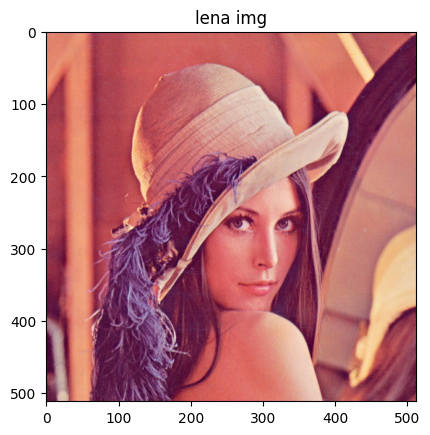

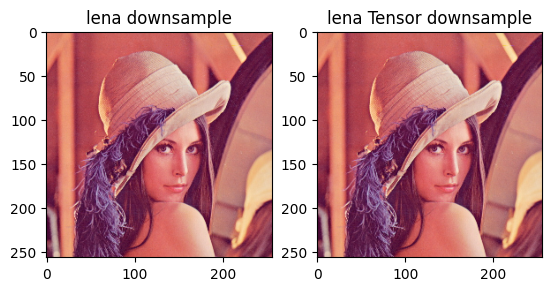

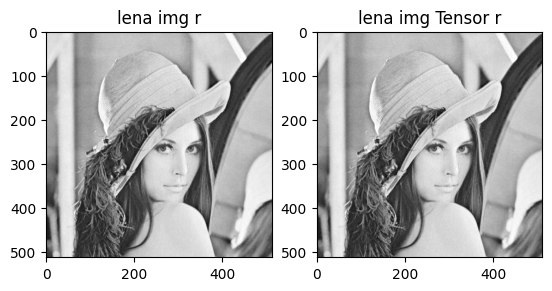

In [23]:
img = cv2.imread("./assets/lena.jpg")
# whc
# 在Tensor的切片操作中不能使用负数作为步长
img = img[...,::-1]


# numpy 方法
# 使用切片方法将图片下采样2倍
img_a = img[::2, ::2, :]

# 获取图像的R通道
img_r = img[...,0:1]

# torch 方法
imgt = torch.tensor(img.copy())

imgt_a = imgt[::2, ::2, :]
imgt_a_ = imgt_a.numpy()

imgt_r = imgt[..., 0:1]
imgt_r_ = imgt_r.numpy()

# 画图
fig1 = plt.figure()
fig1.add_subplot(1, 1, 1); plt.title("lena img")
plt.imshow(img)

fig2 = plt.figure()
fig2.add_subplot(1, 2, 1); plt.title("lena downsample")
plt.imshow(img_a)
fig2.add_subplot(1, 2, 2); plt.title("lena Tensor downsample")
plt.imshow(imgt_a_)

fig3 = plt.figure()
fig3.add_subplot(1, 2, 1); plt.title("lena img r")
plt.imshow(img_r, cmap="gray")
fig3.add_subplot(1, 2, 2); plt.title("lena img Tensor r")
plt.imshow(imgt_r_, cmap="gray")